In [7]:
!pip install kagglehub

   ---------------------------------------- 0.0/42.9 kB ? eta -:--:--
   ---------------------------------------- 42.9/42.9 kB 2.0 MB/s eta 0:00:00


In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

print("Path to dataset files:", path)

100%|██████████| 117M/117M [00:05<00:00, 21.6MB/s] 

Extracting files...


Path to dataset files: C:\Users\enrik\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
url = r"C:\Users\enrik\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3\amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(url)

In [19]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [23]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [ ]:
#distribution of categories

In [25]:
df["category"].nunique()

296

In [31]:
category_counts = df["category"].value_counts()
category_counts

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

C:\Users\enrik\AppData\Local\Temp\ipykernel_191008\3189133476.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


Text(0.5, 1.0, 'Frequency of Unique Values in Category Column')

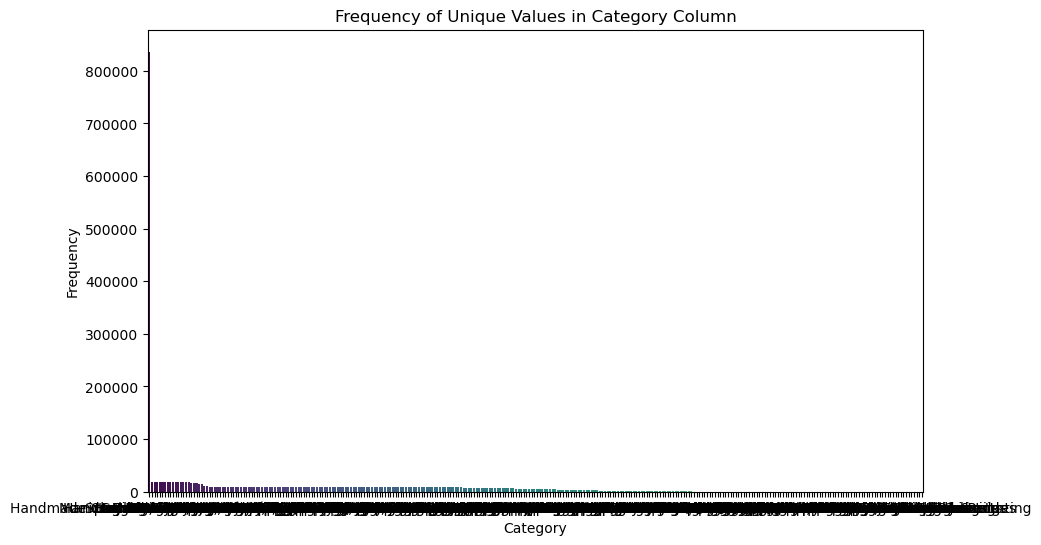

In [37]:
plt.figure(figsize=(10, 6)) #important manage size
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Frequency of Unique Values in Category Column")

In [ ]:
#hay muchos valores únicos por lo que cogeremos los 10 más grandes

In [39]:
category_counts = df["category"].value_counts().nlargest(10)

C:\Users\enrik\AppData\Local\Temp\ipykernel_191008\3189133476.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


Text(0.5, 1.0, 'Frequency of Unique Values in Category Column')

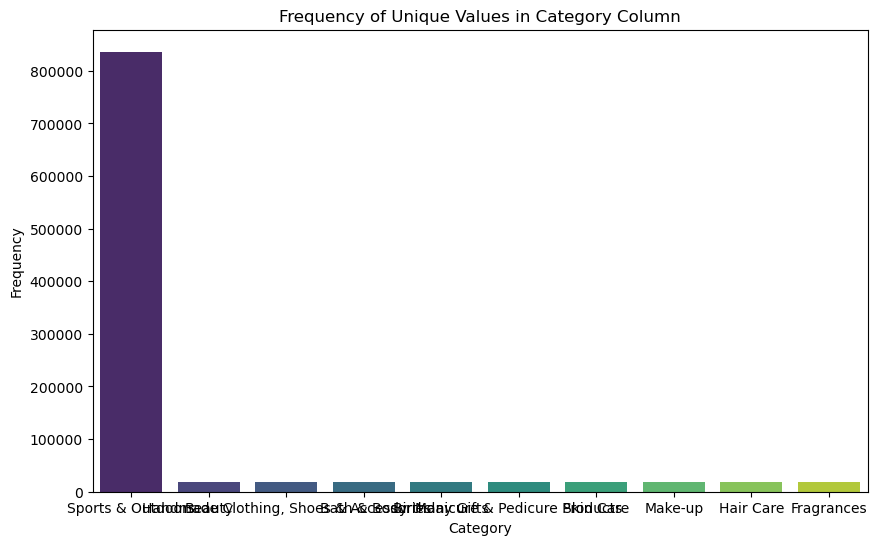

In [41]:
plt.figure(figsize=(10, 6)) #important manage size
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Frequency of Unique Values in Category Column")

In [ ]:
#Sports is the biggest category by far

([<matplotlib.patches.Wedge at 0x20d2a2bad80>,
 [Text(0.36781716062407077, -1.0366824665009275, 'Sports & Outdoors'),
  Text(0.1431444616626433, 1.0906464427555396, 'Beauty'),
  Text(0.011241783908780204, 1.0999425540884162, 'Handmade Clothing, Shoes & Accessories'),
  Text(-0.12007263385852725, 1.0934269809174622, 'Bath & Body'),
  Text(-0.24883244553985004, 1.0714860773928225, 'Birthday Gifts'),
  Text(-0.37359307414100434, 1.034615008084589, 'Manicure & Pedicure Products'),
  Text(-0.4924866700880578, 0.9835938591642267, 'Skin Care'),
  Text(-0.6040395169733669, 0.9193129292763056, 'Make-up'),
  Text(-0.7072280902243113, 0.8425131621509978, 'Hair Care'),
  Text(-0.8002936475768025, 0.7546721656773998, 'Fragrances')],
 [Text(0.20062754215858403, -0.5654631635459604, '83.1%'),
  Text(0.0780787972705327, 0.5948980596848397, '1.9%'),
  Text(0.006131882132061928, 0.5999686658664087, '1.9%'),
  Text(-0.06549416392283304, 0.5964147168640702, '1.9%'),
  Text(-0.13572678847628183, 0.58444695

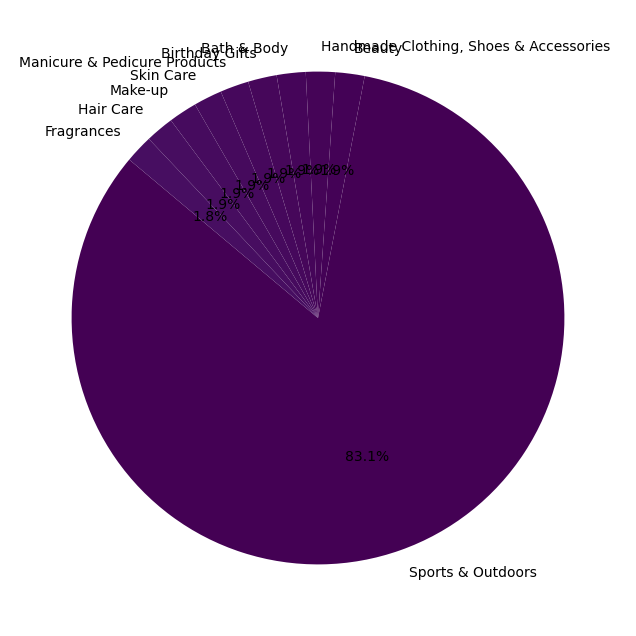

In [43]:
plt.figure(figsize=(8, 8))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis.colors[:10])

In [47]:
df["price"].describe() #8.924381e+01 es el precio mínimo

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64